### **UAS Model Deployment**
##### Patricia Pepita - 2602174176

##### **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### **Read Data**

In [2]:
df = pd.read_csv('data_1D.csv')

##### **EDA**

In [3]:
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,999,0,nonexistent,no
2,2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,999,0,nonexistent,no
3,3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,999,0,nonexistent,no
4,4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,999,0,nonexistent,no


In [4]:
df.shape

(8238, 17)

In [5]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0       int64
age              int64
job             object
marital         object
education       object
default         object
housing         object
loan            object
contact         object
month           object
day_of_week     object
duration       float64
campaign         int64
pdays            int64
previous         int64
poutcome        object
y               object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8238 non-null   int64  
 1   age          8238 non-null   int64  
 2   job          8230 non-null   object 
 3   marital      8238 non-null   object 
 4   education    8238 non-null   object 
 5   default      8238 non-null   object 
 6   housing      8238 non-null   object 
 7   loan         8238 non-null   object 
 8   contact      8238 non-null   object 
 9   month        8238 non-null   object 
 10  day_of_week  8238 non-null   object 
 11  duration     8226 non-null   float64
 12  campaign     8238 non-null   int64  
 13  pdays        8238 non-null   int64  
 14  previous     8238 non-null   int64  
 15  poutcome     8238 non-null   object 
 16  y            8238 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


In [8]:
check_values = df[['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
                   'campaign', 'pdays', 'previous', 'poutcome', 'y']]

for i in check_values:
  print(df[i].value_counts())
  print('\n')

Unnamed: 0
0       1
5534    1
5500    1
5499    1
5498    1
       ..
2741    1
2740    1
2739    1
2738    1
8237    1
Name: count, Length: 8238, dtype: int64


age
31    401
33    383
32    371
36    357
35    355
     ... 
67      2
86      2
85      1
89      1
17      1
Name: count, Length: 72, dtype: int64


job
admin.           2033
blue-collar      1870
technician       1372
services          822
management        546
retired           366
entrepreneur      294
self-employed     263
housemaid         219
unemployed        196
student           184
unknown            65
Name: count, dtype: int64


marital
married     4994
single      2338
divorced     892
unknown       14
Name: count, dtype: int64


education
university.degree      2379
high.school            1915
basic.9y               1243
professional.course    1043
basic.4y                817
basic.6y                486
unknown                 349
illiterate                6
Name: count, dtype: int64


default
no         64

> Saya menghapus kolom 'Unnamed: 0' karena tidak akan digunakan dalam modelling

In [9]:
df = df.drop(df.columns[[0]], axis=1)

> Mengganti nama kolom 'y' menjadi 'prediction' agar dapat lebih mudah dipahami

In [10]:
df = df.rename(columns={'y': 'prediction'})

In [11]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,prediction
0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,999,0,nonexistent,no
2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,999,0,nonexistent,no
3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,999,0,nonexistent,no
4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,999,0,nonexistent,no


### **Data Splitting**

#### 80% training set, 20% testing set

In [12]:
input_df = df.drop('prediction',axis=1)
output_df = pd.DataFrame(df['prediction'])

In [13]:
output_df.head(3)

,prediction
0,yes
1,no
2,no


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [15]:
print("Training set size:", len(x_train))
print("Testing set size:", len(x_test))

total_samples = len(df)
print("Training set percentage:", len(x_train) / total_samples * 100)
print("Testing set percentage:", len(x_test) / total_samples * 100)

Training set size: 6590
Testing set size: 1648
Training set percentage: 79.99514445253702
Testing set percentage: 20.004855547462977


### **Data Preprocessing**

#### Melihat Missing Values di Setiap Dataset

In [16]:
x_train.isnull().sum()

age            0
job            5
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       9
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [17]:
x_test.isnull().sum()

age            0
job            3
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       3
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [18]:
y_train.isnull().sum()

prediction    0
dtype: int64

In [19]:
y_test.isnull().sum()

prediction    0
dtype: int64

> Ada missing values pada data training, testing. Oleh karena itu, akan dilakukannya missing value imputation.

#### Missing Value Imputation

In [20]:
x_train['job'].value_counts()

job
admin.           1620
blue-collar      1488
technician       1117
services          658
management        433
retired           291
entrepreneur      243
self-employed     210
housemaid         172
unemployed        162
student           139
unknown            52
Name: count, dtype: int64

In [21]:
mode = x_train['job'].mode()
print(mode)

0    admin.
Name: job, dtype: object


In [22]:
x_train['job'] = x_train['job'].fillna('admin.')
x_test['job'] = x_test['job'].fillna('admin.')

In [23]:
print(x_train['job'].isnull().value_counts())
print(x_test['job'].isnull().value_counts())

job
False    6590
Name: count, dtype: int64
job
False    1648
Name: count, dtype: int64


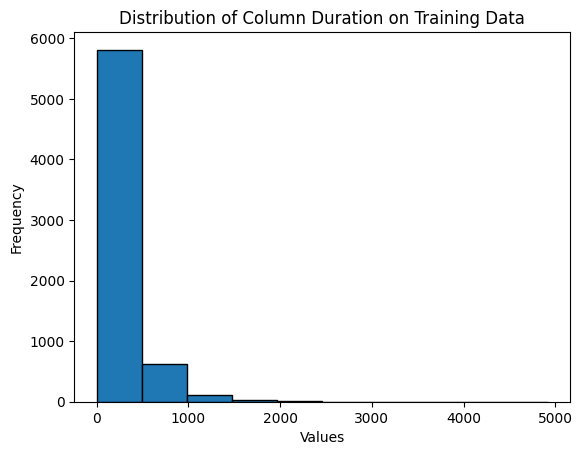

In [24]:
plt.hist(x_train['duration'], edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Column Duration on Training Data')
plt.show()

> Distribusi data right-skewed sehingga imputasi akan dilakukan dengan median, bukan mean

In [25]:
mean = x_train['duration'].median()

x_train['duration'] = x_train['duration'].fillna(mean)
x_test['duration'] = x_test['duration'].fillna(mean)

In [26]:
print(x_train['duration'].isnull().value_counts())
print(x_test['duration'].isnull().value_counts())

duration
False    6590
Name: count, dtype: int64
duration
False    1648
Name: count, dtype: int64


#### Encoding untuk Tipe Data Categorical

> Mapping digunakan untuk kolom categorical yang memiliki order atau urutan. OHE digunakan untuk kolom categorical yang tidak memiliki order atau urutan.

In [27]:
# Mapping
mapping = {'unknown': 0, 'illiterate': 1, 'basic.4y': 2,
           'basic.6y': 3, 'basic.9y': 4, 'high.school': 5,
           'professional.course': 6, 'university.degree': 7}

x_train['education'] = x_train['education'].map(mapping)
x_test['education'] = x_test['education'].map(mapping)

mapping = {'mar': 3, 'apr': 4, 'may': 5,
           'jun': 6, 'jul': 7, 'aug': 8,
           'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

x_train['month'] = x_train['month'].map(mapping)
x_test['month'] = x_test['month'].map(mapping)

mapping = {'mon': 1, 'tue': 2, 'wed': 3,
           'thu': 4, 'fri': 5}

x_train['day_of_week'] = x_train['day_of_week'].map(mapping)
x_test['day_of_week'] = x_test['day_of_week'].map(mapping)


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# One Hot Encoding
columns_to_encode = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']

column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), columns_to_encode)
    ],
    remainder='passthrough'
)

x_train = column_transformer.fit_transform(x_train)
x_test = column_transformer.transform(x_test)

##### Save encoder dalam pickle file untuk encoder dalam file prediction

In [29]:
import pickle as pkl
filename = 'uas_pickle_encode.pkl'
pkl.dump(column_transformer, open(filename, 'wb'))

In [30]:
x_train = pd.DataFrame(x_train, columns=column_transformer.get_feature_names_out())
x_test = pd.DataFrame(x_test, columns=column_transformer.get_feature_names_out())

In [31]:
x_train.head(3)

,encoder__job_admin.,encoder__job_blue-collar,encoder__job_entrepreneur,encoder__job_housemaid,encoder__job_management,encoder__job_retired,encoder__job_self-employed,encoder__job_services,encoder__job_student,encoder__job_technician,...,encoder__poutcome_nonexistent,encoder__poutcome_success,remainder__age,remainder__education,remainder__month,remainder__day_of_week,remainder__duration,remainder__campaign,remainder__pdays,remainder__previous
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,31.0,4.0,6.0,2.0,103.0,1.0,3.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,32.0,6.0,7.0,3.0,183.0,1.0,999.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,47.0,6.0,8.0,5.0,78.0,3.0,999.0,0.0


In [32]:
x_train.replace(False, 0, inplace=True)
x_train.replace(True, 1, inplace=True)

x_test.replace(False, 0, inplace=True)
x_test.replace(True, 1, inplace=True)

In [33]:
x_train.head(3)

,encoder__job_admin.,encoder__job_blue-collar,encoder__job_entrepreneur,encoder__job_housemaid,encoder__job_management,encoder__job_retired,encoder__job_self-employed,encoder__job_services,encoder__job_student,encoder__job_technician,...,encoder__poutcome_nonexistent,encoder__poutcome_success,remainder__age,remainder__education,remainder__month,remainder__day_of_week,remainder__duration,remainder__campaign,remainder__pdays,remainder__previous
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,31.0,4.0,6.0,2.0,103.0,1.0,3.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,32.0,6.0,7.0,3.0,183.0,1.0,999.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,47.0,6.0,8.0,5.0,78.0,3.0,999.0,0.0


In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6590 entries, 0 to 6589
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encoder__job_admin.            6590 non-null   float64
 1   encoder__job_blue-collar       6590 non-null   float64
 2   encoder__job_entrepreneur      6590 non-null   float64
 3   encoder__job_housemaid         6590 non-null   float64
 4   encoder__job_management        6590 non-null   float64
 5   encoder__job_retired           6590 non-null   float64
 6   encoder__job_self-employed     6590 non-null   float64
 7   encoder__job_services          6590 non-null   float64
 8   encoder__job_student           6590 non-null   float64
 9   encoder__job_technician        6590 non-null   float64
 10  encoder__job_unemployed        6590 non-null   float64
 11  encoder__job_unknown           6590 non-null   float64
 12  encoder__marital_divorced      6590 non-null   f

> Merename kolom menjadi format yang lebih sesuai

In [36]:
y_train['prediction'] = y_train['prediction'].replace({'yes': 1})
y_train['prediction'] = y_train['prediction'].replace({'no': 0})
y_test['prediction'] = y_test['prediction'].replace({'yes': 1})
y_test['prediction'] = y_test['prediction'].replace({'no': 0})

/var/folders/qp/gs0vrs952ds991c0k_nq4ns80000gn/T/ipykernel_42770/2469618644.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train['prediction'] = y_train['prediction'].replace({'no': 0})
/var/folders/qp/gs0vrs952ds991c0k_nq4ns80000gn/T/ipykernel_42770/2469618644.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test['prediction'] = y_test['prediction'].replace({'no': 0})


In [37]:
x_train.head(6)

,encoder__job_admin.,encoder__job_blue-collar,encoder__job_entrepreneur,encoder__job_housemaid,encoder__job_management,encoder__job_retired,encoder__job_self-employed,encoder__job_services,encoder__job_student,encoder__job_technician,...,encoder__poutcome_nonexistent,encoder__poutcome_success,remainder__age,remainder__education,remainder__month,remainder__day_of_week,remainder__duration,remainder__campaign,remainder__pdays,remainder__previous
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,31.0,4.0,6.0,2.0,103.0,1.0,3.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,32.0,6.0,7.0,3.0,183.0,1.0,999.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,47.0,6.0,8.0,5.0,78.0,3.0,999.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,36.0,7.0,7.0,4.0,10.0,3.0,999.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,45.0,7.0,11.0,3.0,391.0,2.0,999.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,42.0,7.0,8.0,2.0,68.0,2.0,999.0,0.0


In [38]:
x_train.columns

Index(['encoder__job_admin.', 'encoder__job_blue-collar',
       'encoder__job_entrepreneur', 'encoder__job_housemaid',
       'encoder__job_management', 'encoder__job_retired',
       'encoder__job_self-employed', 'encoder__job_services',
       'encoder__job_student', 'encoder__job_technician',
       'encoder__job_unemployed', 'encoder__job_unknown',
       'encoder__marital_divorced', 'encoder__marital_married',
       'encoder__marital_single', 'encoder__marital_unknown',
       'encoder__default_no', 'encoder__default_unknown',
       'encoder__housing_no', 'encoder__housing_unknown',
       'encoder__housing_yes', 'encoder__loan_no', 'encoder__loan_unknown',
       'encoder__loan_yes', 'encoder__contact_cellular',
       'encoder__contact_telephone', 'encoder__poutcome_failure',
       'encoder__poutcome_nonexistent', 'encoder__poutcome_success',
       'remainder__age', 'remainder__education', 'remainder__month',
       'remainder__day_of_week', 'remainder__duration', 'remainde

In [39]:
x_train.shape

(6590, 37)

#### Mengecek Outliers untuk Data Numerik

- age
- duration
- campaign
- pdays
- previous

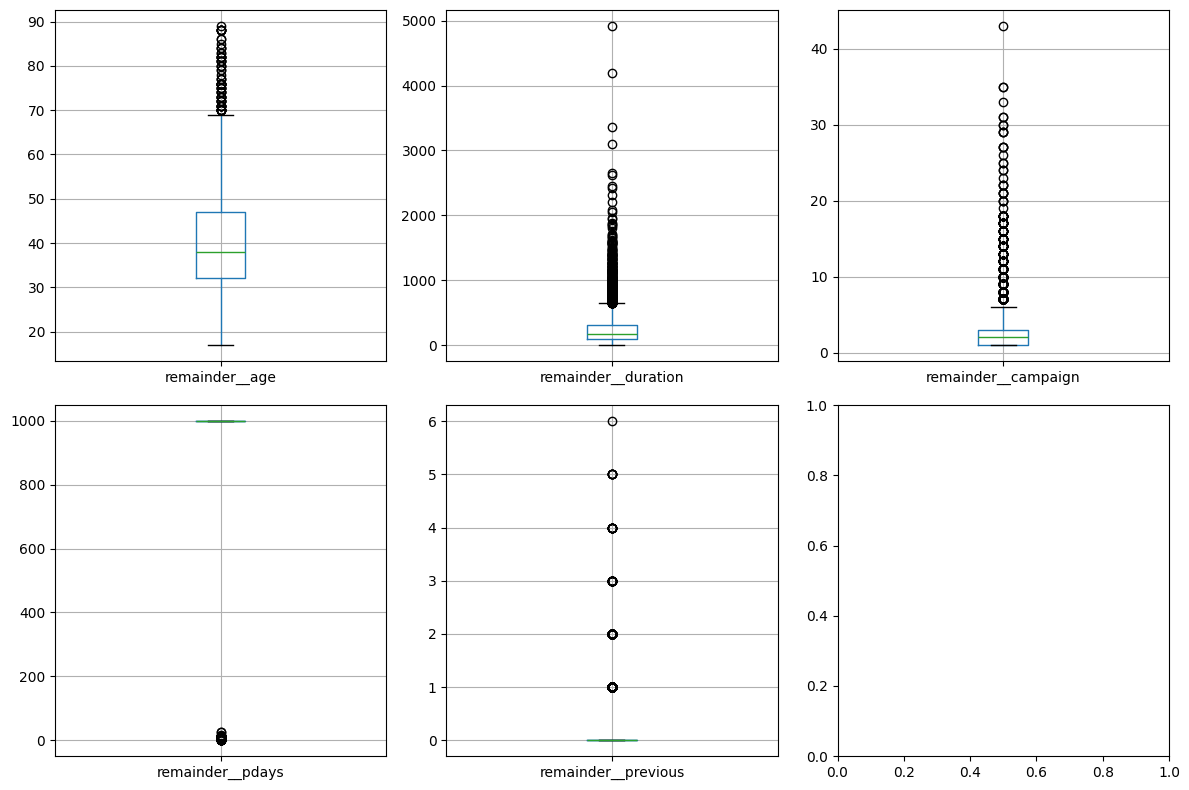

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

age_boxplot = x_train.boxplot(column=['remainder__age'], ax=axes[0, 0])
duration_boxplot = x_train.boxplot(column=['remainder__duration'], ax=axes[0, 1])
campaign_boxplot = x_train.boxplot(column=['remainder__campaign'], ax=axes[0, 2])

pdays_boxplot = x_train.boxplot(column=['remainder__pdays'], ax=axes[1, 0])
previous_boxplot = x_train.boxplot(column=['remainder__previous'], ax=axes[1, 1])

plt.tight_layout()
plt.show()

> Terdapat banyak outliers pada setiap kolom di atas. Saya tidak akan mengubah value tersebut karena setelah saya melakukan research, handling outlier tidak perlu dilakukan untuk algoritma jaman sekarang.

#### **Data Modelling dan Evaluasi**
##### **Model 1: Random Forest**

In [41]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [42]:
y_predict=RF_class.predict(x_test)

In [43]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1435
           1       0.83      0.11      0.20       213

    accuracy                           0.88      1648
   macro avg       0.86      0.55      0.57      1648
weighted avg       0.88      0.88      0.84      1648



In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8275862068965517
Recall: 0.11267605633802817
F1 Score: 0.19834710743801653


> Model Random Forest menghasilkan akurasi 88% dengan presisi 82.76%

##### **Hyperparameter Tuning untuk Algoritma Random Forest**

In [45]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

In [46]:
RF_class2 = RandomForestClassifier()
RF_class2= GridSearchCV(RF_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)

In [47]:
RF_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("Accuracy :",RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 8}
Accuracy : 0.9030349013657055


In [49]:
RF_class_best = RandomForestClassifier(criterion= 'entropy',max_depth=8)

In [50]:
RF_class_best.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8)

In [51]:
y_predict_best=RF_class_best.predict(x_test)

In [52]:
print(classification_report(y_test, y_predict_best, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1435
           1       0.74      0.23      0.35       213

    accuracy                           0.89      1648
   macro avg       0.82      0.61      0.64      1648
weighted avg       0.88      0.89      0.86      1648



In [53]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8275862068965517
Recall: 0.11267605633802817
F1 Score: 0.19834710743801653


> Model Random Forest menghasilkan akurasi 89% dengan presisi 82.76% setelah dilakukannya hyperparameter tuning. Jika dibandingkan tanpa tuning hyperparameter, akurasi naik 1% dan presisi tetap sama.

##### **Model 2: Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
y_predict= model_tree.predict(x_test)

In [58]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1435
           1       0.45      0.45      0.45       213

    accuracy                           0.86      1648
   macro avg       0.69      0.68      0.68      1648
weighted avg       0.86      0.86      0.86      1648



In [59]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.45454545454545453
Recall: 0.4460093896713615
F1 Score: 0.4502369668246445


> Decision Tree menghasilkan akurasi 86% dengan presisi 45.45%. Hasil ini di bawah model dengan Random Forest.

##### **Hyperparameter Tuning untuk Algoritma Decision Tree**

In [60]:
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

In [61]:
model_tree = DecisionTreeClassifier()
model_tree= GridSearchCV(model_tree,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)

In [62]:
model_tree.fit(x_train,y_train)
print("Tuned Hyperparameters :", model_tree.best_params_)
print("Accuracy :",model_tree.best_score_)

Tuned Hyperparameters : {'criterion': 'log_loss', 'max_depth': 4}
Accuracy : 0.9047040971168435


In [63]:
model_tree = DecisionTreeClassifier(criterion='log_loss',max_depth=4)

In [64]:
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4)

In [65]:
y_predict_best = model_tree.predict(x_test)

In [66]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1435
           1       0.61      0.38      0.47       213

    accuracy                           0.89      1648
   macro avg       0.76      0.67      0.70      1648
weighted avg       0.87      0.89      0.88      1648



In [67]:
precision = precision_score(y_test, y_predict_best)
recall = recall_score(y_test, y_predict_best)
f1 = f1_score(y_test, y_predict_best)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6136363636363636
Recall: 0.38028169014084506
F1 Score: 0.4695652173913043


> Decision Tree model menghasilkan akurasi 89% dengan presisi 61.36% dengan hyperparameter tuning. Hasil ini di atas hasil model decision tree tanpa hyperparameter tuning, tetapi tetap di bawah model dengan Random Forest.

#### **Kesimpulan**

> Akurasi dan presisi terbaik dari algoritma Random Forest dengan hyperparameter tuning. Akurasi yang dihasilkan 89% dengan presisi 82.76%. Hasil recall dan F1 score yang didapatkan juga paling rendah diantara model lainnya. 

> Oleh karena itu, prediksi model akan dilakukan dengan algoritma Random Forest dengan hyperparameter tuning.

In [54]:
import pickle as pkl
filename = 'uas_pickle_model.pkl'
pkl.dump(RF_class_best, open(filename, 'wb'))

**Video Penjelasan**

https://binusianorg-my.sharepoint.com/personal/patricia_pepita_binus_ac_id/_layouts/15/guestaccess.aspx?share=EVNxeesgItVBo-1B0nGrjS4BbrW6S2TlrAh5v89ug3Nibw&e=os8q83 